In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import optimizers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('2017EE10544.csv',header=None)
data=np.array(data)
n=3000
m=784
x=data[0:n,0:m]
t=data[0:n,784:785]
x=np.array(x)
x=x/1000
t=np.array(t)

In [32]:
def crossAccuracy(folds,nodes):
    b=n//folds
    ac=0
    y=[]
    y1=[]
    f=0
    for i in range(folds):
        temp=np.array(x[f:f+b,0:m])
        temp1=np.array(t[f:f+b])
        f=f+b
        y.append(temp)
        y1.append(temp1)
    
    for i in range(folds):
        x_test=y[i]
        t_test=y1[i]
        x_train=np.reshape([],(0,m))
        t_train=np.reshape([],(0,1))
        
        for j in range(folds):
            if i!=j:
                x_train=np.concatenate((x_train,y[j]),axis=0)
                t_train=np.concatenate((t_train,y1[j]),axis=0)
                
        
        model = keras.Sequential([
            keras.layers.Dense(nodes, activation='sigmoid'),
#             keras.layers.Dense(200, activation='sigmoid'),
            keras.layers.Dense(10, activation='softmax')
        ])
        sgd = optimizers.SGD(lr=0.2, decay=0, momentum=0.9, nesterov=True)
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        myModel=model.fit(x_train, t_train,validation_data=(x_test,t_test),batch_size=1,epochs=25)
        test_loss, test_acc = model.evaluate(x_test,  t_test, verbose=2)
        ac+=test_acc
        
        break
        
    return ac

In [42]:
def batch(folds,nodes):
    b=n//folds
    ac=0
    y=[]
    y1=[]
    f=0
    for i in range(folds):
        temp=np.array(x[f:f+b,0:m])
        temp1=np.array(t[f:f+b])
        f=f+b
        y.append(temp)
        y1.append(temp1)
    
    for i in range(folds):
        x_test=y[i]
        t_test=y1[i]
        x_train=np.reshape([],(0,m))
        t_train=np.reshape([],(0,1))
        
        for j in range(folds):
            if i!=j:
                x_train=np.concatenate((x_train,y[j]),axis=0)
                t_train=np.concatenate((t_train,y1[j]),axis=0)
                
        
        model = keras.Sequential([
            keras.layers.Dense(nodes, activation='sigmoid'),
            keras.layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        myModel=model.fit(x_train, t_train,validation_data=(x_test,t_test),batch_size=1,epochs=25)
        history=myModel.history['val_accuracy']
        plt.plot(range(1,26),history,label='Batch Size=1')
        
        
        
#         model = keras.Sequential([
#             keras.layers.Dense(nodes, activation='sigmoid'),
#             keras.layers.Dense(10, activation='softmax')
#         ])
#         model.compile(optimizer='adam',
#                       loss='sparse_categorical_crossentropy',
#                       metrics=['accuracy'])
#         myModel=model.fit(x_train, t_train,validation_data=(x_test,t_test),batch_size=500,epochs=25)
#         history=myModel.history['val_accuracy']
#         plt.plot(range(1,26),history,label='Batch Size=500') 
        
        
        
#         model = keras.Sequential([
#             keras.layers.Dense(nodes, activation='sigmoid'),
#             keras.layers.Dense(10, activation='softmax')
#         ])
#         model.compile(optimizer='adam',
#                       loss='sparse_categorical_crossentropy',
#                       metrics=['accuracy'])
#         myModel=model.fit(x_train, t_train,validation_data=(x_test,t_test),batch_size=1000,epochs=25)
#         history=myModel.history['val_accuracy']
#         plt.plot(range(1,26),history,label='Batch Size=1000') 
        
        
        
        
        plt.xlabel('Epochs')
        plt.ylabel('Cross-Validation Accuracy')
        plt.legend(loc='lower center')
        break
        

Train on 2250 samples, validate on 750 samples
Epoch 1/25
2250/2250 [==============================] - 6s 3ms/sample - loss: 1.4350 - accuracy: 0.6649 - val_loss: 0.8600 - val_accuracy: 0.8147
Epoch 2/25
2250/2250 [==============================] - 6s 2ms/sample - loss: 0.6461 - accuracy: 0.8618 - val_loss: 0.5426 - val_accuracy: 0.8613
Epoch 3/25
2250/2250 [==============================] - 5s 2ms/sample - loss: 0.4412 - accuracy: 0.8916 - val_loss: 0.4544 - val_accuracy: 0.8587
Epoch 4/25
2250/2250 [==============================] - 6s 3ms/sample - loss: 0.3465 - accuracy: 0.9111 - val_loss: 0.3954 - val_accuracy: 0.8827
Epoch 5/25
2250/2250 [==============================] - 5s 2ms/sample - loss: 0.2951 - accuracy: 0.9227 - val_loss: 0.3671 - val_accuracy: 0.8987
Epoch 6/25
2250/2250 [==============================] - 5s 2ms/sample - loss: 0.2519 - accuracy: 0.9342 - val_loss: 0.3419 - val_accuracy: 0.9027
Epoch 7/25
2250/2250 [==============================] - 6s 2ms/sample - loss:

Epoch 6/25
2250/2250 [==============================] - 0s 22us/sample - loss: 2.1917 - accuracy: 0.3711 - val_loss: 2.1750 - val_accuracy: 0.4760
Epoch 7/25
2250/2250 [==============================] - 0s 19us/sample - loss: 2.1647 - accuracy: 0.5058 - val_loss: 2.1514 - val_accuracy: 0.5027
Epoch 8/25
2250/2250 [==============================] - 0s 18us/sample - loss: 2.1391 - accuracy: 0.5396 - val_loss: 2.1280 - val_accuracy: 0.5187
Epoch 9/25
2250/2250 [==============================] - 0s 15us/sample - loss: 2.1149 - accuracy: 0.5613 - val_loss: 2.1046 - val_accuracy: 0.5720
Epoch 10/25
2250/2250 [==============================] - 0s 21us/sample - loss: 2.0910 - accuracy: 0.6133 - val_loss: 2.0811 - val_accuracy: 0.6240
Epoch 11/25
2250/2250 [==============================] - 0s 16us/sample - loss: 2.0671 - accuracy: 0.6631 - val_loss: 2.0568 - val_accuracy: 0.6640
Epoch 12/25
2250/2250 [==============================] - 0s 24us/sample - loss: 2.0433 - accuracy: 0.6956 - val_loss

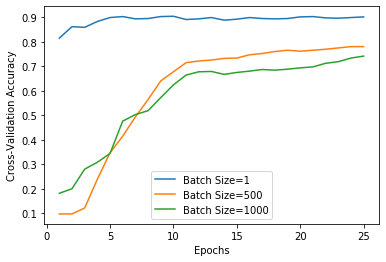

In [41]:
batch(4,50)

Train on 2250 samples, validate on 750 samples
Epoch 1/25
2250/2250 [==============================] - 4s 2ms/sample - loss: 1.3770 - accuracy: 0.6751 - val_loss: 0.8370 - val_accuracy: 0.8027
Epoch 2/25
2250/2250 [==============================] - 3s 2ms/sample - loss: 0.6244 - accuracy: 0.8609 - val_loss: 0.5371 - val_accuracy: 0.8573
Epoch 3/25
2250/2250 [==============================] - 3s 2ms/sample - loss: 0.4288 - accuracy: 0.8916 - val_loss: 0.4372 - val_accuracy: 0.8613
Epoch 4/25
2250/2250 [==============================] - 3s 2ms/sample - loss: 0.3434 - accuracy: 0.9133 - val_loss: 0.3883 - val_accuracy: 0.8853
Epoch 5/25
2250/2250 [==============================] - 3s 2ms/sample - loss: 0.2926 - accuracy: 0.9218 - val_loss: 0.3656 - val_accuracy: 0.8893
Epoch 6/25
2250/2250 [==============================] - 4s 2ms/sample - loss: 0.2562 - accuracy: 0.9262 - val_loss: 0.3395 - val_accuracy: 0.8933
Epoch 7/25
2250/2250 [==============================] - 4s 2ms/sample - loss:

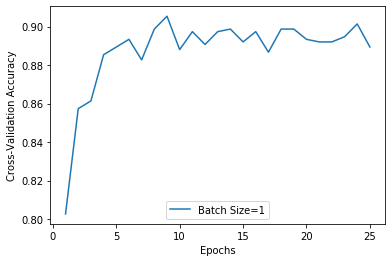

In [43]:
batch(4,50)